In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [2]:
import pandas as pd
import seaborn  as sns
import numpy as np
import matplotlib.pyplot as plt
import pybedtools
import os

# Loading genetics

In [3]:
genetics = pd.read_csv("CAD_SNPs/rsids.imputed.tsv", sep='\t')

# Intersecting genetics with REgulamentary output

https://bedtools.readthedocs.io/en/latest/content/tools/intersect.html

In [47]:
if not os.path.exists('tmp'):
    os.makedirs('tmp')
pybedtools.set_tempdir('tmp')

In [60]:
# Loading REgulamentary huvec results
re = pd.read_csv("/project/Wellcome_Discovery/shared/REgulamentary/pipeline_output/endothelial-cell-of-umbilical-vein/ATAC/08_REgulamentary/mlv_REgulamentary.csv", sep='\t')
#

genetics_filt = genetics[['CHR_ID', 'CHR_POS', 'SNPS']]
genetics_filt.columns = ['chr', 'start', 'SNPS']
genetics_filt['end'] = genetics_filt['start']+1
genetics_filt = genetics_filt[['chr', 'start', 'end', 'SNPS']]

re_filt = re[['chromosome', 'start', 'end']]
re_filt.columns = ['chr', 'start', 'end']
re_filt = re_filt[['chr', 'start', 'end']]

genetics_pbt = pybedtools.BedTool.from_dataframe(genetics_filt)
re_pbt = pybedtools.BedTool.from_dataframe(re_filt)

intersect1 = genetics_pbt.intersect(re_pbt)
intersect1 = intersect1.to_dataframe().sort_values(['chrom', 'start'])
intersect1.reset_index(inplace=True, drop=True)

intersect2 = re_pbt.intersect(genetics_pbt, wa=True)
intersect2 = intersect2.to_dataframe().sort_values(['chrom', 'start'])
intersect2.reset_index(inplace=True, drop=True)

intersect_final = intersect2
intersect_final['SNPS'] = intersect1['name']
intersect_final['SNP_chrom'] = intersect1['chrom']
intersect_final['SNP_start'] = intersect1['start']
intersect_final.index = intersect_final['chrom'].astype(str)+":"+intersect_final['start'].astype(str)+":"+intersect_final['end'].astype(str)

re_filt2 = re
re_filt2.index = re['chromosome'].astype(str)+":"+re['start'].astype(str)+":"+re['end'].astype(str)
re_filt2 = re_filt2[re_filt2.index.isin(intersect_final.index.tolist())]

dict_re = {}
for i, j in zip(re_filt2.index, re_filt2['RE']):
    dict_re[i] = j

re_list = []
for i in intersect_final.index:
    re_list.append(dict_re[i])
    
intersect_final['RE'] = re_list

df1 = pd.DataFrame(intersect_final['RE'].value_counts())
df1['RE'] = df1.index
df1.index.name = None

In [61]:
# Loading REgulamentary huvec results
re = pd.read_csv("/project/Wellcome_Discovery/shared/REgulamentary/pipeline_output/endothelial-cell-of-umbilical-vein/CTCF/08_REgulamentary/mlv_REgulamentary.csv", sep='\t')
#

genetics_filt = genetics[['CHR_ID', 'CHR_POS', 'SNPS']]
genetics_filt.columns = ['chr', 'start', 'SNPS']
genetics_filt['end'] = genetics_filt['start']+1
genetics_filt = genetics_filt[['chr', 'start', 'end', 'SNPS']]

re_filt = re[['chromosome', 'start', 'end']]
re_filt.columns = ['chr', 'start', 'end']
re_filt = re_filt[['chr', 'start', 'end']]

genetics_pbt = pybedtools.BedTool.from_dataframe(genetics_filt)
re_pbt = pybedtools.BedTool.from_dataframe(re_filt)

intersect1 = genetics_pbt.intersect(re_pbt)
intersect1 = intersect1.to_dataframe().sort_values(['chrom', 'start'])
intersect1.reset_index(inplace=True, drop=True)

intersect2 = re_pbt.intersect(genetics_pbt, wa=True)
intersect2 = intersect2.to_dataframe().sort_values(['chrom', 'start'])
intersect2.reset_index(inplace=True, drop=True)

intersect_final = intersect2
intersect_final['SNPS'] = intersect1['name']
intersect_final['SNP_chrom'] = intersect1['chrom']
intersect_final['SNP_start'] = intersect1['start']
intersect_final.index = intersect_final['chrom'].astype(str)+":"+intersect_final['start'].astype(str)+":"+intersect_final['end'].astype(str)

re_filt2 = re
re_filt2.index = re['chromosome'].astype(str)+":"+re['start'].astype(str)+":"+re['end'].astype(str)
re_filt2 = re_filt2[re_filt2.index.isin(intersect_final.index.tolist())]

dict_re = {}
for i, j in zip(re_filt2.index, re_filt2['RE']):
    dict_re[i] = j

re_list = []
for i in intersect_final.index:
    re_list.append(dict_re[i])
    
intersect_final['RE'] = re_list

df2 = pd.DataFrame(intersect_final['RE'].value_counts())
df2['RE'] = df2.index
df2.index.name = None

In [62]:
# Loading REgulamentary huvec results
re = pd.read_csv("/project/Wellcome_Discovery/shared/REgulamentary/pipeline_output/endothelial-cell-of-umbilical-vein/merge/08_REgulamentary/mlv_REgulamentary.csv", sep='\t')
#

genetics_filt = genetics[['CHR_ID', 'CHR_POS', 'SNPS']]
genetics_filt.columns = ['chr', 'start', 'SNPS']
genetics_filt['end'] = genetics_filt['start']+1
genetics_filt = genetics_filt[['chr', 'start', 'end', 'SNPS']]

re_filt = re[['chromosome', 'start', 'end']]
re_filt.columns = ['chr', 'start', 'end']
re_filt = re_filt[['chr', 'start', 'end']]

genetics_pbt = pybedtools.BedTool.from_dataframe(genetics_filt)
re_pbt = pybedtools.BedTool.from_dataframe(re_filt)

intersect1 = genetics_pbt.intersect(re_pbt)
intersect1 = intersect1.to_dataframe().sort_values(['chrom', 'start'])
intersect1.reset_index(inplace=True, drop=True)

intersect2 = re_pbt.intersect(genetics_pbt, wa=True)
intersect2 = intersect2.to_dataframe().sort_values(['chrom', 'start'])
intersect2.reset_index(inplace=True, drop=True)

intersect_final = intersect2
intersect_final['SNPS'] = intersect1['name']
intersect_final['SNP_chrom'] = intersect1['chrom']
intersect_final['SNP_start'] = intersect1['start']
intersect_final.index = intersect_final['chrom'].astype(str)+":"+intersect_final['start'].astype(str)+":"+intersect_final['end'].astype(str)

re_filt2 = re
re_filt2.index = re['chromosome'].astype(str)+":"+re['start'].astype(str)+":"+re['end'].astype(str)
re_filt2 = re_filt2[re_filt2.index.isin(intersect_final.index.tolist())]

dict_re = {}
for i, j in zip(re_filt2.index, re_filt2['RE']):
    dict_re[i] = j

re_list = []
for i in intersect_final.index:
    re_list.append(dict_re[i])
    
intersect_final['RE'] = re_list

df3 = pd.DataFrame(intersect_final['RE'].value_counts())
df3['RE'] = df3.index
df3.index.name = None

In [88]:
dict_colors = {}
dict_colors['Enhancer'] = sns.color_palette('colorblind')[0]
dict_colors['Promoter'] = sns.color_palette('colorblind')[1]
dict_colors['CTCF'] = sns.color_palette('colorblind')[2]
dict_colors['Enhancer/CTCF'] = sns.color_palette('colorblind')[3]
dict_colors['Promoter/CTCF'] = sns.color_palette('colorblind')[4]

In [90]:
color_lits = []
for i in df1['RE']:
    color_lits.append(dict_colors[i])
df1['color'] = color_lits

color_lits = []
for i in df2['RE']:
    color_lits.append(dict_colors[i])
df2['color'] = color_lits

color_lits = []
for i in df3['RE']:
    color_lits.append(dict_colors[i])
df3['color'] = color_lits

In [91]:
df1 = df1.T[['Enhancer', 'Promoter', 'CTCF', 'Enhancer/CTCF', 'Promoter/CTCF']].T
df2 = df2.T[['Enhancer', 'CTCF', 'Enhancer/CTCF', 'Promoter/CTCF']].T
df3 = df3.T[['Enhancer', 'Promoter', 'CTCF', 'Enhancer/CTCF', 'Promoter/CTCF']].T

In [58]:
# import plotly.express as px
# fig = px.pie(df, values='count', names='RE', title='RE')
# fig.show()

In [82]:
sns.color_palette('colorblind')[:5]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844)]

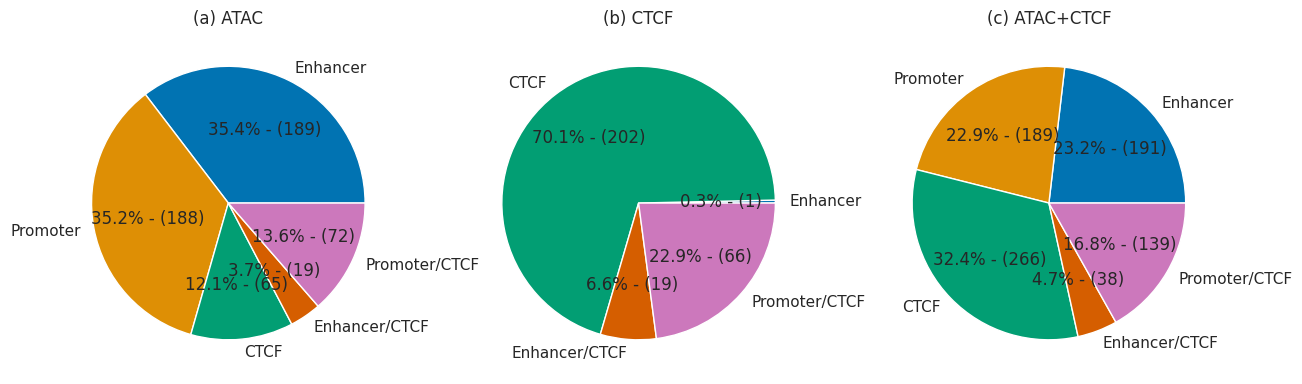

In [103]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}% - ({:d})".format(pct, absolute)

fig, ax = plt.subplots(1,3,figsize=(15,45))
sns.set(font_scale=1.0)
ax[0].pie(df1['count'], labels = df1['RE'], colors = df1['color'], autopct=lambda pct: func(pct, df1['count']))
ax[1].pie(df2['count'], labels = df2['RE'], colors = df2['color'], autopct=lambda pct: func(pct, df2['count']))
ax[2].pie(df3['count'], labels = df3['RE'], colors = df3['color'], autopct=lambda pct: func(pct, df3['count']))
ax[0].set_title("(a) ATAC")
ax[1].set_title("(b) CTCF")
ax[2].set_title("(c) ATAC+CTCF")

plt.show()
fig.savefig("figures_paper/piechart_gentics_in_RE.pdf", format='pdf', bbox_inches='tight')